In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder 

import warnings
warnings.filterwarnings("ignore")


import Draft_wrangle as w

# Acquire

In [2]:
# Call the function to acquire the test data
# Order Matters 
# (Outpatient, inpatient, beneficiary, df)
test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()

# Call the function to acquire the train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


#### Taking a look at the data 

In [3]:
# Verify 
test_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [4]:
# Verify 
test_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Verify 
test_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [6]:
# Verify 
test_df.head(3)

,Provider
0,PRV51002
1,PRV51006
2,PRV51009


In [7]:
# Verify 
train_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [8]:
# Verify 
train_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verify 
train_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
# Verify 
train_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [11]:
# list of all the data frames 
list_of_dataframes = [test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df]

# List of lables for the dataframes 
list_of_dataframes_name = ['test_outpatient_df', 'test_inpatient_df', 'test_beneficiary_df', 'test_df']

sep_line = '=' * 40

# Create a forloop to zip lables and DataFrame shape 
for dataframe, name in zip(list_of_dataframes, list_of_dataframes_name):
    print(f'Name: {name}')
    print(f'Shape: {dataframe.shape}')
    print(sep_line)

Name: test_outpatient_df
Shape: (125841, 27)
Name: test_inpatient_df
Shape: (9551, 30)
Name: test_beneficiary_df
Shape: (63968, 25)
Name: test_df
Shape: (1353, 1)


    - Takeaways 
- can see that they have the same number of columns
- Test data is smaller as expected 

# Prepare

In [12]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')

# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)

# Display the sorted dataframe
print(fraud_df)


      Provider PotentialFraud
0     PRV51001             No
1     PRV51002            NaN
2     PRV51003            Yes
3     PRV51004             No
4     PRV51005            Yes
...        ...            ...
6758  PRV57759             No
6759  PRV57760             No
6760  PRV57761             No
6761  PRV57762             No
6762  PRV57763             No

[6763 rows x 2 columns]


In [13]:
fraud_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [14]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        6763 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 105.8+ KB


In [15]:
fraud_df.shape

(6763, 2)

### Combine inpatiant data


In [16]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Verify 
w.DataFrame_shape(train_inpatient_df, test_inpatient_df, inpatient_df)

Sum of both train and test -> 50025
Sum of new DataFrame -> 50025


### Combind outpatiant data

In [18]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [19]:
# Verify 
w.DataFrame_shape(train_outpatient_df, test_outpatient_df, outpatient_df)

Sum of both train and test -> 643578
Sum of new DataFrame -> 643578


### Combind beneficiary data

In [20]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [21]:
# Verify 
w.DataFrame_shape(train_beneficiary_df, test_beneficiary_df, beneficiary_df)

Sum of both train and test -> 202524
Sum of new DataFrame -> 202524


### look at the test and train data (target Variable)

In [22]:
# 
train_df.info()
print(sep_line)
print(sep_line)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [23]:
print(train_df.PotentialFraud.value_counts())
print(sep_line)
print(train_df.PotentialFraud.value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


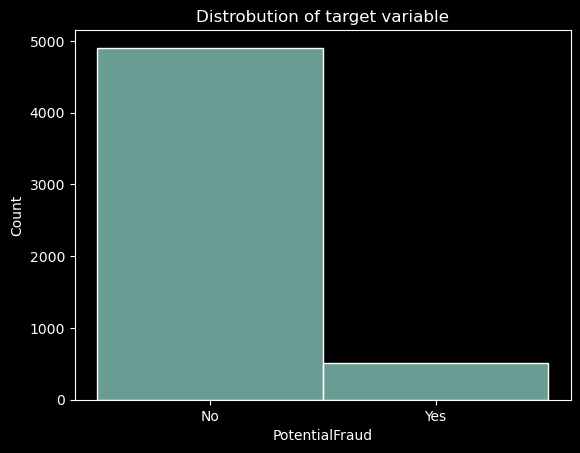

In [24]:
sns.histplot(data = train_df, x="PotentialFraud")
plt.title('Distrobution of target variable')
plt.show()

# Prepare beneficiary Data

In [25]:
beneficiary_df = w.prep_beneficiary_data(beneficiary_df)
w.beneficiary_label_encode(beneficiary_df)
beneficiary_df = w.beneficiary_OneHotLabel_encode(beneficiary_df)
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


# prepare inpatient data 


In [26]:
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.columns

Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'admissiondt', 'clmadmitdiagnosiscode',
       'deductibleamtpaid', 'dischargedt', 'diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'claimduration', 'numphysicians'],
      dtype='object')

In [28]:
inpatient_df.columns

Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'admissiondt', 'clmadmitdiagnosiscode',
       'deductibleamtpaid', 'dischargedt', 'diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'claimduration', 'numphysicians'],
      dtype='object')

# prepare outpatiant data 

In [29]:
outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [30]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.columns


Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'deductibleamtpaid', 'clmadmitdiagnosiscode',
       'claimduration'],
      dtype='object')

- Join all dataframes

In [31]:
outpatient_df.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY000000,PHY000000,71988,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY000000,PHY000000,82382,...,72887,4280,7197,V4577,00000,00000,00000,0,71947,0


In [32]:
inpatient_df.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4254,25062,40390,4019,00000,331.0,000,000,8,3
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,PHY000000,2009-08-13,...,486,5119,29620,20300,00000,3893.0,000,000,17,3


In [33]:
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


In [34]:
fraud_df.columns = fraud_df.columns.str.lower()
fraud_df.head(3)

,provider,potentialfraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [35]:
outpatient_df = w.merge_outpatient_fraud(beneficiary_df, outpatient_df, fraud_df)
inpatient_df = w.merge_inpatient_fraud(beneficiary_df, inpatient_df, fraud_df)

In [36]:
outpatient_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes
1,BENE11007,0,1,0,45,610,12,12,0,0,...,V4589,72887,8448,00000,00000,00000,0.0,71691,20.0,No
2,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,78099,0.0,No


In [37]:
inpatient_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
0,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No
2,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,000,000,000,3.0,3.0,No
3,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No


# Explore

In [38]:
inpatient_df.columns 

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'admissiondt', 'clmadmitdiagnosiscode', 'deductibleamtpaid',
       'dischargedt', 'diagnosisgro

In [48]:
outpatient_df.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', '

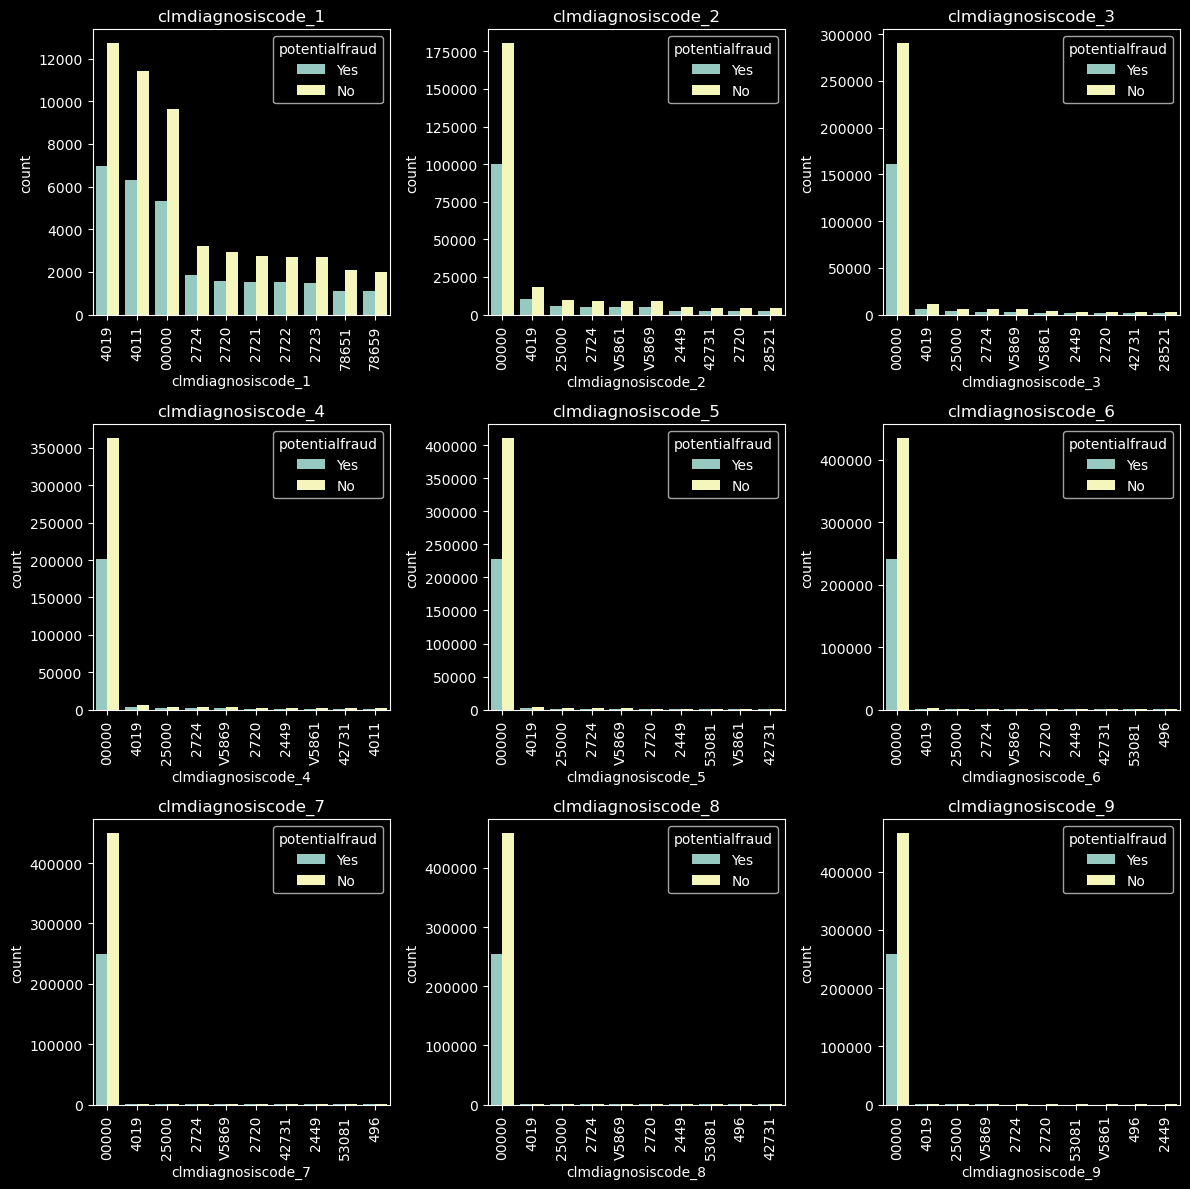

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    column_name = f'clmdiagnosiscode_{i+1}'
    code_counts = outpatient_df[column_name].value_counts()[:10]
    
    sns.countplot(data=outpatient_df, x=column_name, hue='potentialfraud', ax=ax, order=code_counts.index)
    ax.set_title(column_name)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees for each subplot

plt.tight_layout()
plt.show()

- What providers submit the most claims? 

In [49]:
outpatient_df.provider.value_counts()

provider
PRV51459    11406
PRV53797     6887
PRV51574     5671
PRV53918     5360
PRV55215     4808
            ...  
PRV51689        1
PRV56873        1
PRV54856        1
PRV57461        1
PRV56377        1
Name: count, Length: 5012, dtype: int64

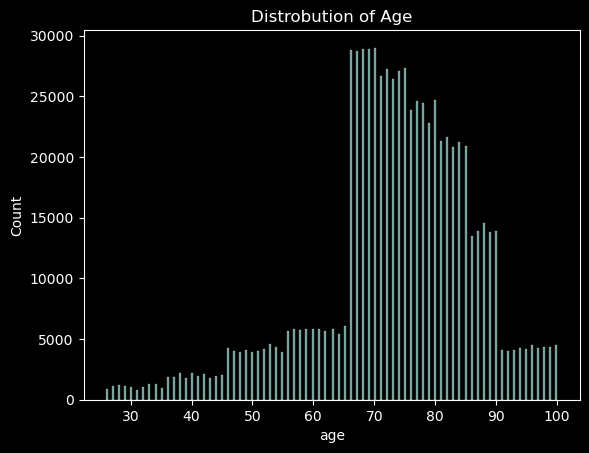

In [ ]:
sns.histplot(data= outpatient_df, x='age')
plt.title('Distrobution of Age')
plt.show()

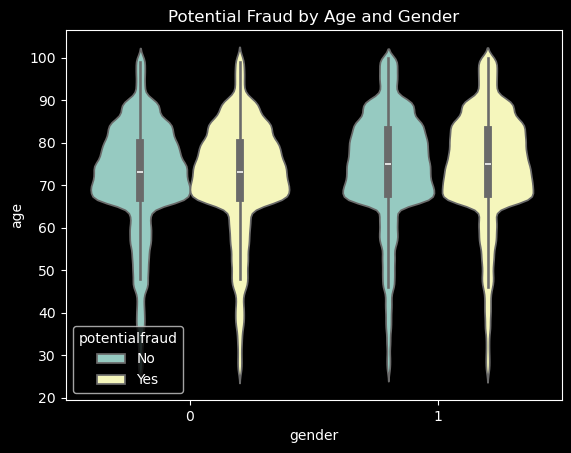

In [54]:
sns.violinplot(data=outpatient_df, x="gender", y="age", hue="potentialfraud")
plt.title('Potential Fraud by Age and Gender')
plt.show()

In [ ]:
break

In [ ]:
sns.scatterplot(data=outpatient_df, x='age', y='claimid', hue='potentialfraud')
plt.title('')

KeyboardInterrupt: 